Author Name : Johan Winarwan Nawawi

NRP         : 3322600023

Class       : 3 STr SDT A

### import required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### read the data set and separate the dependent and independent variables

In [2]:
dataset = pd.read_csv('../Data/heart.csv')
data_independen = dataset.iloc[:,0:-1]
label = dataset.iloc[:,-1]
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### data standardization

In [3]:
scaler = StandardScaler()
data = scaler.fit_transform(data_independen)
data

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

## 1. Conduct experiments using Single Perceptron and Multi Perceptron

### single layer perceptron

In [4]:
# single layer perceptron model using heart classification dataset
clf = Perceptron(tol=1e-3, random_state=42, penalty='l2', alpha=0.01)
clf.fit(data, label)

print(f'accuracy score: {clf.score(data, label)}')
print(f'prediction results: {clf.predict(data).tolist()}')
print(f'expected: {label.tolist()}')

accuracy score: 0.8250825082508251
prediction results: [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]
expected: [1, 1, 1, 1, 1, 1, 1, 1, 

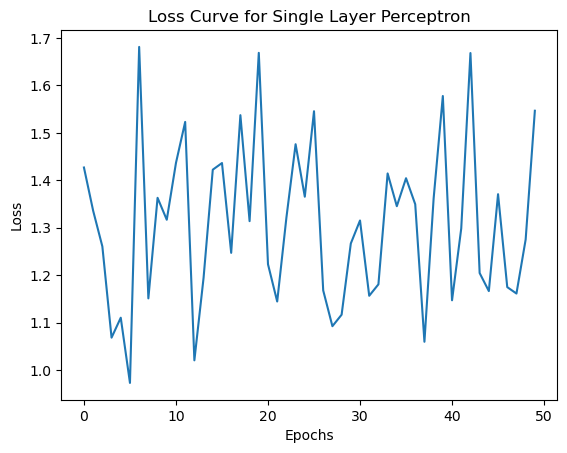

In [5]:
# variables to store loss at each epoch
losses = []
n_epochs = 50

# unique classes
classes = np.unique(label)

# loop through the number of epochs, performing partial fitting
for epoch in range(n_epochs):
    clf.partial_fit(data, label, classes=classes)
    
    # calculate hinge loss manually
    predictions = clf.decision_function(data)  # raw decision function output
    hinge_loss = np.mean(np.maximum(0, 1 - label * predictions))  # hinge loss formula
    losses.append(hinge_loss)

# plot the loss values
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve for Single Layer Perceptron')
plt.show()

### multi layer perceptron

In [6]:
# model multi layer perceptron using heart classification dataset
model = MLP(tol=0, hidden_layer_sizes=(15,), activation = 'relu', learning_rate_init = 0.1, solver='sgd')
model.fit(data,label)

MLPClassifier(hidden_layer_sizes=(15,), learning_rate_init=0.1, solver='sgd',
              tol=0)

In [7]:
# score evaluation
print(f'accuracy score: {model.score(data,label)}')
print(f'prediction results: {model.predict(data).tolist()}')
print(f'expected: {label.tolist()}')

accuracy score: 0.9933993399339934
prediction results: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
expected: [1, 1, 1, 1, 1, 1, 1, 1, 

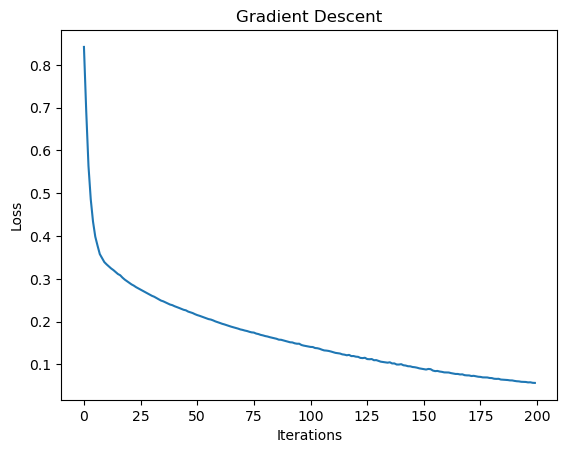

In [8]:
# plot gradient descent
plt.plot(model.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Gradient Descent')

plt.show()

### experiment changing ```hidden layer size``` with ```learning rate 0.1```

accuracy score with a hidden layer of 5 is 0.9372937293729373


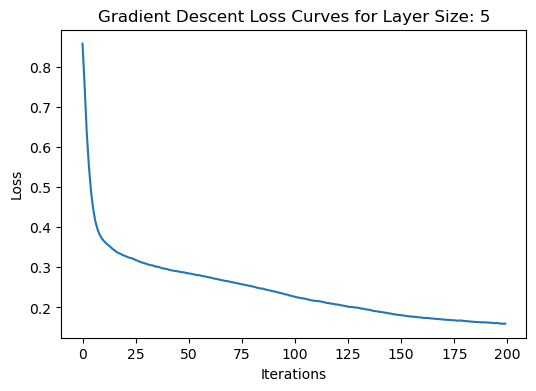

accuracy score with a hidden layer of 10 is 0.976897689768977


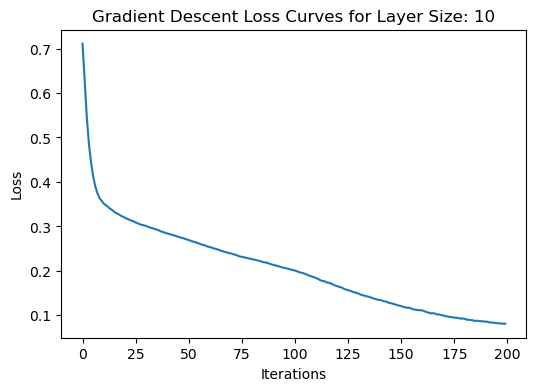

accuracy score with a hidden layer of 15 is 0.9834983498349835


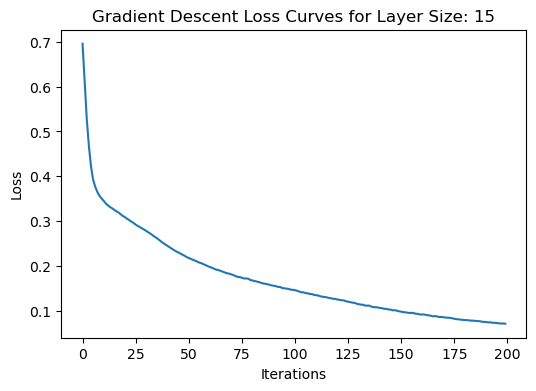

accuracy score with a hidden layer of 20 is 0.9966996699669967


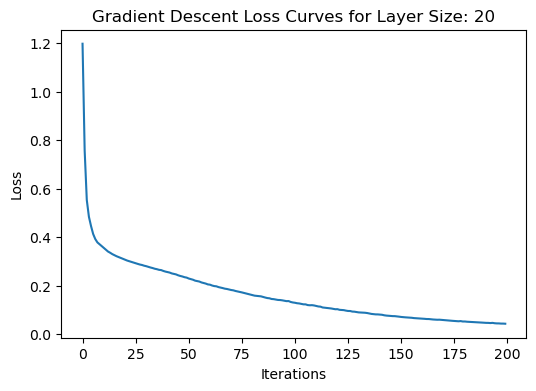

accuracy score with a hidden layer of 25 is 0.9966996699669967


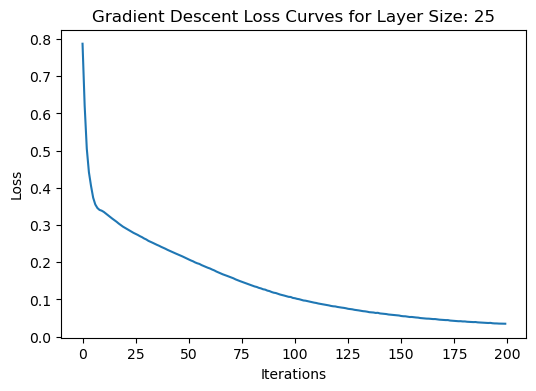

In [9]:
hidden_layers = [5, 10, 15, 20, 25]

for layer_size in hidden_layers:
    model = MLP(tol=0, hidden_layer_sizes=(layer_size,), activation='relu',
                learning_rate_init=0.1, solver='sgd', random_state=42)
    model.fit(data, label)
    pred = model.predict(data)

    print(f'accuracy score with a hidden layer of {layer_size} is {model.score(data,label)}')

    plt.figure(figsize=(6, 4))
    plt.plot(model.loss_curve_)

    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Gradient Descent Loss Curves for Layer Size: {layer_size}')
    plt.show()

#### classification report with various hidden layers

-------Classification Report for MLP with Hidden Layer Size: 5--------
              precision    recall  f1-score   support

           0     0.9343    0.9275    0.9309       138
           1     0.9398    0.9455    0.9426       165

    accuracy                         0.9373       303
   macro avg     0.9370    0.9365    0.9368       303
weighted avg     0.9373    0.9373    0.9373       303

----------------------------------------------------------------------


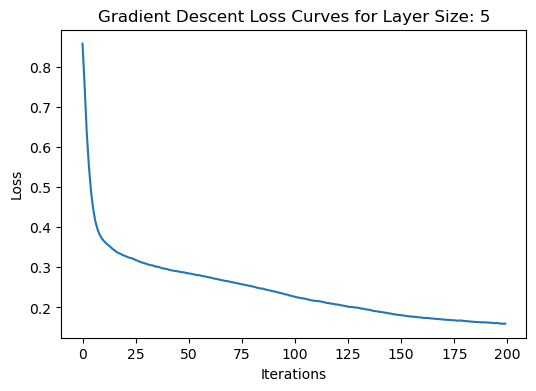

-------Classification Report for MLP with Hidden Layer Size: 10-------
              precision    recall  f1-score   support

           0     0.9852    0.9638    0.9744       138
           1     0.9702    0.9879    0.9790       165

    accuracy                         0.9769       303
   macro avg     0.9777    0.9758    0.9767       303
weighted avg     0.9770    0.9769    0.9769       303

----------------------------------------------------------------------


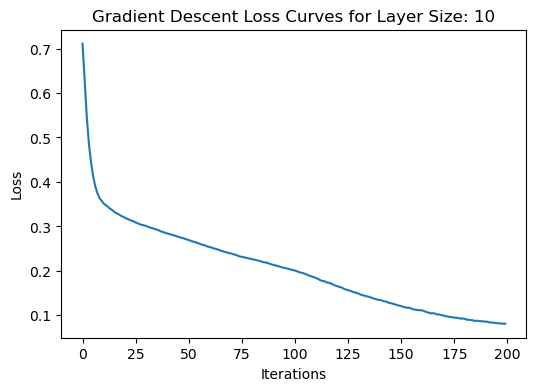

-------Classification Report for MLP with Hidden Layer Size: 15-------
              precision    recall  f1-score   support

           0     0.9926    0.9710    0.9817       138
           1     0.9762    0.9939    0.9850       165

    accuracy                         0.9835       303
   macro avg     0.9844    0.9825    0.9833       303
weighted avg     0.9837    0.9835    0.9835       303

----------------------------------------------------------------------


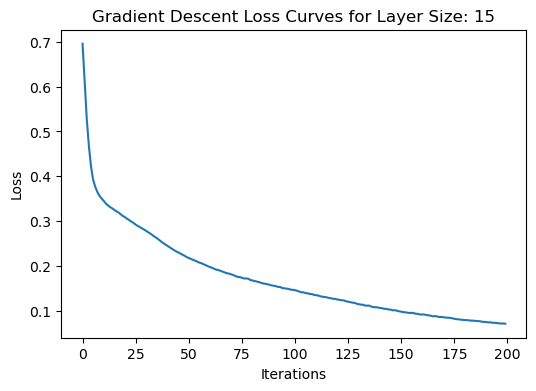

-------Classification Report for MLP with Hidden Layer Size: 20-------
              precision    recall  f1-score   support

           0     1.0000    0.9928    0.9964       138
           1     0.9940    1.0000    0.9970       165

    accuracy                         0.9967       303
   macro avg     0.9970    0.9964    0.9967       303
weighted avg     0.9967    0.9967    0.9967       303

----------------------------------------------------------------------


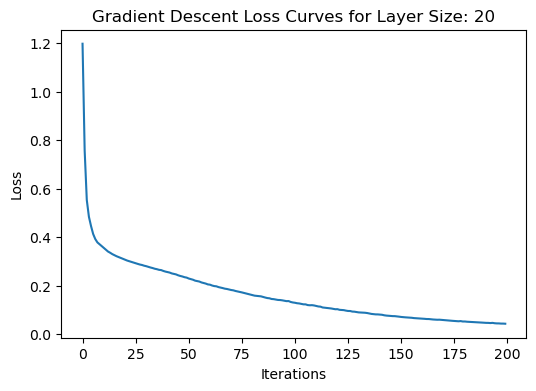

-------Classification Report for MLP with Hidden Layer Size: 25-------
              precision    recall  f1-score   support

           0     1.0000    0.9928    0.9964       138
           1     0.9940    1.0000    0.9970       165

    accuracy                         0.9967       303
   macro avg     0.9970    0.9964    0.9967       303
weighted avg     0.9967    0.9967    0.9967       303

----------------------------------------------------------------------


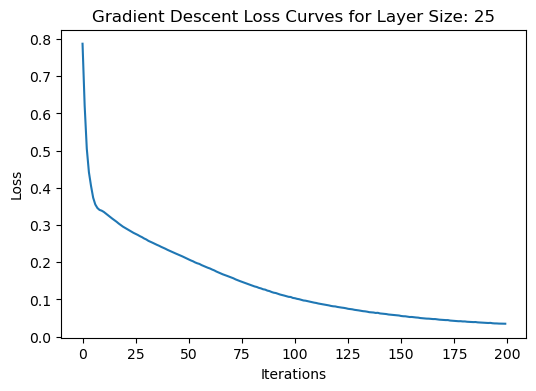

In [10]:
hidden_layers = [5, 10, 15, 20, 25]

# loop through each hidden layer
for layer_size in hidden_layers:
    # initialize MLP model with a fixed learning rate of 0.1
    model = MLP(tol=0, hidden_layer_sizes=(layer_size,), activation='relu',
                learning_rate_init=0.1, solver='sgd', random_state=42)
    model.fit(data, label)
    pred = model.predict(data)
    
    print(f'Classification Report for MLP with Hidden Layer Size: {layer_size}'.center(70, "-"))
    print(classification_report(label, pred, digits=4))
    print(70 * '-')

    plt.figure(figsize=(6, 4))
    plt.plot(model.loss_curve_)
    
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Gradient Descent Loss Curves for Layer Size: {layer_size}')
    plt.show()

### experiment changing ```learning rate``` with ```hidden layer 10```

accuracy score with a learning rate of 0.01 is 0.8613861386138614


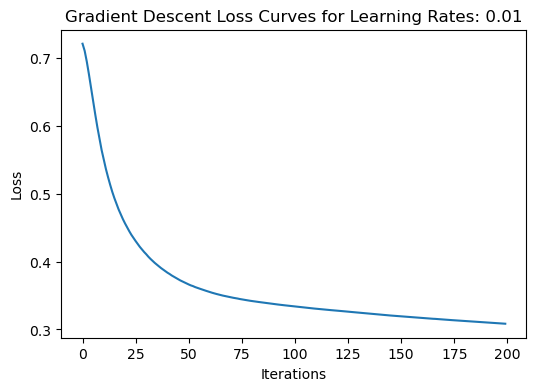

accuracy score with a learning rate of 0.05 is 0.9240924092409241


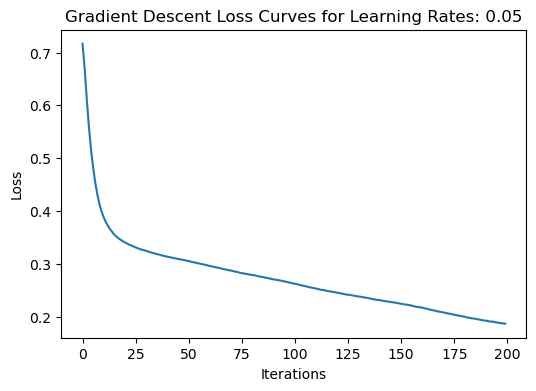

accuracy score with a learning rate of 0.1 is 0.976897689768977


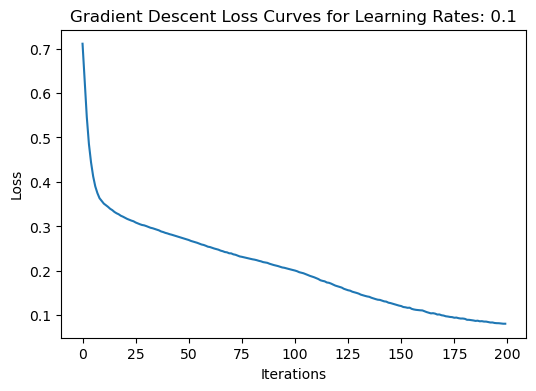

accuracy score with a learning rate of 0.5 is 0.9966996699669967


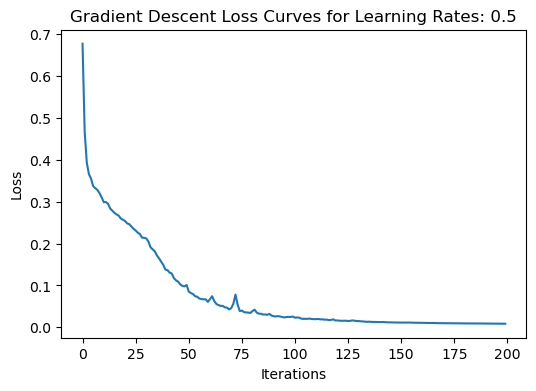

accuracy score with a learning rate of 1 is 0.9504950495049505


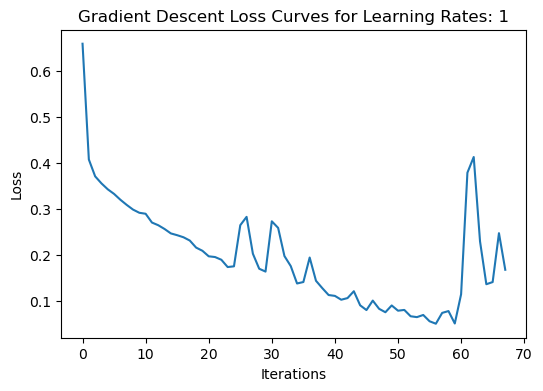

In [11]:
learning_rates = [0.01, 0.05, 0.1, 0.5, 1]

for lr in learning_rates:
    model = MLP(hidden_layer_sizes=(10,), activation='relu',
                learning_rate_init=lr, solver='sgd', random_state=42)
    model.fit(data, label)
    pred = model.predict(data)
    print(f'accuracy score with a learning rate of {lr} is {model.score(data,label)}')

    plt.figure(figsize=(6, 4))
    plt.plot(model.loss_curve_)

    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Gradient Descent Loss Curves for Learning Rates: {lr}')
    plt.show()

#### classification report with various learning rates

--------Classification Report for MLP with Learning Rate: 0.01--------
              precision    recall  f1-score   support

           0     0.9624    0.9275    0.9446       138
           1     0.9412    0.9697    0.9552       165

    accuracy                         0.9505       303
   macro avg     0.9518    0.9486    0.9499       303
weighted avg     0.9508    0.9505    0.9504       303

----------------------------------------------------------------------


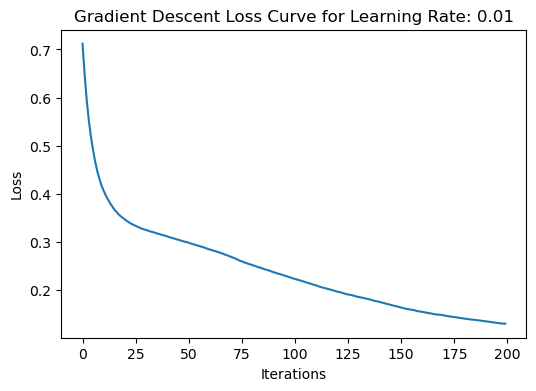

--------Classification Report for MLP with Learning Rate: 0.05--------
              precision    recall  f1-score   support

           0     1.0000    0.9928    0.9964       138
           1     0.9940    1.0000    0.9970       165

    accuracy                         0.9967       303
   macro avg     0.9970    0.9964    0.9967       303
weighted avg     0.9967    0.9967    0.9967       303

----------------------------------------------------------------------


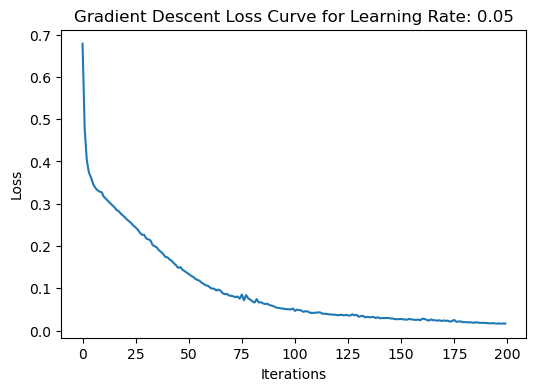

--------Classification Report for MLP with Learning Rate: 0.1---------
              precision    recall  f1-score   support

           0     0.9926    0.9783    0.9854       138
           1     0.9820    0.9939    0.9880       165

    accuracy                         0.9868       303
   macro avg     0.9873    0.9861    0.9867       303
weighted avg     0.9869    0.9868    0.9868       303

----------------------------------------------------------------------


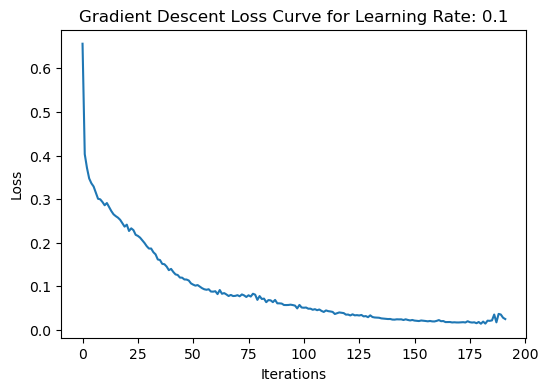

--------Classification Report for MLP with Learning Rate: 0.5---------
              precision    recall  f1-score   support

           0     0.9048    0.9638    0.9333       138
           1     0.9679    0.9152    0.9408       165

    accuracy                         0.9373       303
   macro avg     0.9364    0.9395    0.9371       303
weighted avg     0.9392    0.9373    0.9374       303

----------------------------------------------------------------------


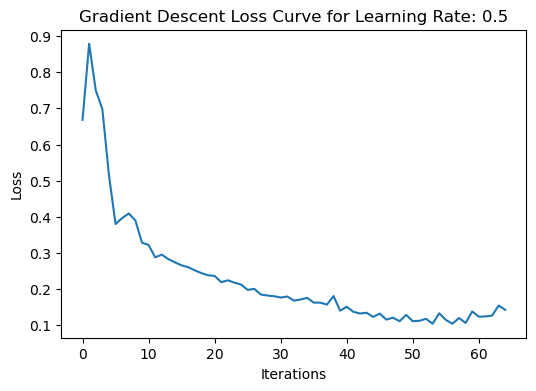

---------Classification Report for MLP with Learning Rate: 1----------
              precision    recall  f1-score   support

           0     0.8903    1.0000    0.9420       138
           1     1.0000    0.8970    0.9457       165

    accuracy                         0.9439       303
   macro avg     0.9452    0.9485    0.9438       303
weighted avg     0.9500    0.9439    0.9440       303

----------------------------------------------------------------------


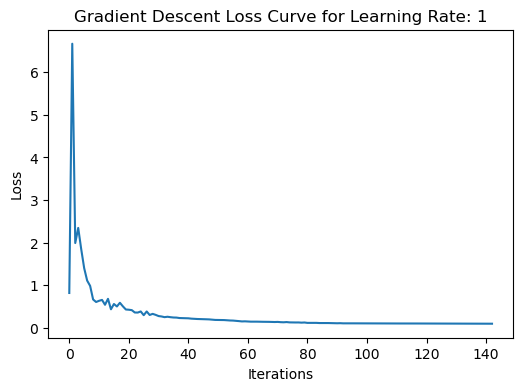

In [12]:
learning_rates = [0.01, 0.05, 0.1, 0.5, 1]

# loop through each learning rate
for lr in learning_rates:
    # initialize MLP model with a fixed hidden layer size of 10
    model = MLP(hidden_layer_sizes=(10,), activation='relu',
                learning_rate_init=lr, random_state=42)
    model.fit(data, label)
    pred = model.predict(data)
    
    print(f'Classification Report for MLP with Learning Rate: {lr}'.center(70, "-"))
    print(classification_report(label, pred, digits=4))
    print(70 * '-')

    plt.figure(figsize=(6, 4))
    plt.plot(model.loss_curve_)
    
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Gradient Descent Loss Curve for Learning Rate: {lr}')
    plt.show()